In [1]:
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

In [2]:
# files = ['traj_dat/whole.3.xtc'] 
files = ['traj_dat/whole.1.xtc','traj_dat/whole.2.xtc','traj_dat/whole.3.xtc'] 

gro = 'traj_dat/10.gro'

In [3]:
# traj = md.load(files, top='traj_dat/10.gro')

In [125]:
# torsions_feat = pyemma.coordinates.featurizer(gro)
# torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ['backbone\ntorsions']

# positions_feat = pyemma.coordinates.featurizer(gro)
# positions_feat.add_selection(positions_feat.select_Backbone())
# positions_data = pyemma.coordinates.load(files, features=positions_feat)
# labels += ['backbone atom\npositions']

distances_feat = pyemma.coordinates.featurizer(gro)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ['backbone atom\ndistances']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

In [5]:
torsions_data

[array([[ 0.46842632, -0.88350254, -0.29260758, ..., -0.98272943,
          0.9235897 ,  0.38338235],
        [-0.0364675 , -0.9993348 ,  0.91917324, ..., -0.96064556,
          0.9131367 ,  0.40765345],
        [ 0.53611153, -0.84414715,  0.91524094, ..., -0.8887826 ,
          0.71049297,  0.7037043 ],
        ...,
        [ 0.3879877 , -0.92166454,  0.6883354 , ..., -0.7933126 ,
          0.79755974, -0.60323995],
        [ 0.2524884 , -0.9675999 ,  0.7965136 , ..., -0.9293299 ,
          0.7256284 , -0.6880868 ],
        [ 0.3545633 , -0.935032  ,  0.8611113 , ..., -0.9339713 ,
          0.7364234 , -0.67652094]], dtype=float32),
 array([[ 0.49835178, -0.8669749 ,  0.06640356, ..., -0.9957102 ,
          0.8490708 ,  0.52827907],
        [ 0.5329916 , -0.84612054,  0.9261948 , ..., -0.9998043 ,
          0.86759686,  0.49726823],
        [ 0.66342527, -0.74824256,  0.8211958 , ..., -0.9982005 ,
          0.9748092 ,  0.2230402 ],
        ...,
        [ 0.38158447, -0.924334  ,  0.5

In [7]:
np.shape(torsions_data[0])

(1001, 144)

In [12]:
tica = pyemma.coordinates.tica(torsions_data, lag=5, dim=4)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [120]:
s_concat = np.concatenate(state_probabilities)

In [121]:
np.shape(tica_concatenated)

(2502, 4)

In [126]:
np.shape(state_probabilities)

/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(3,)

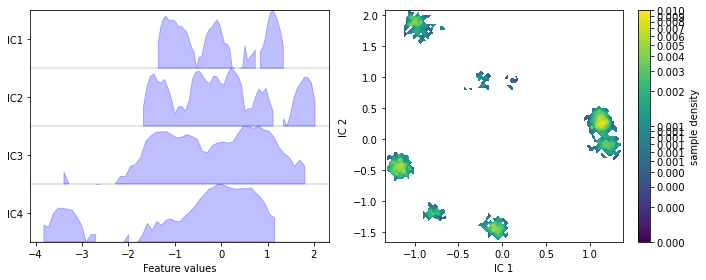

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

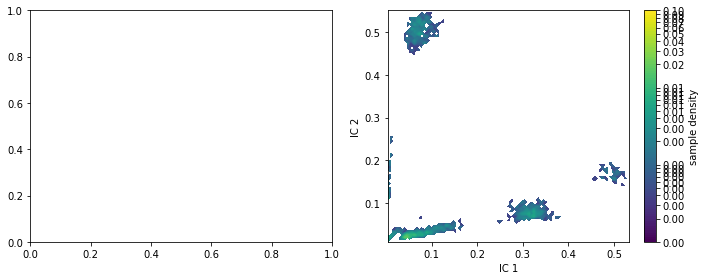

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# pyemma.plots.plot_feature_histograms(
#     s_concat,
#     ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
#     ylog=True)
pyemma.plots.plot_density(*s_concat[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

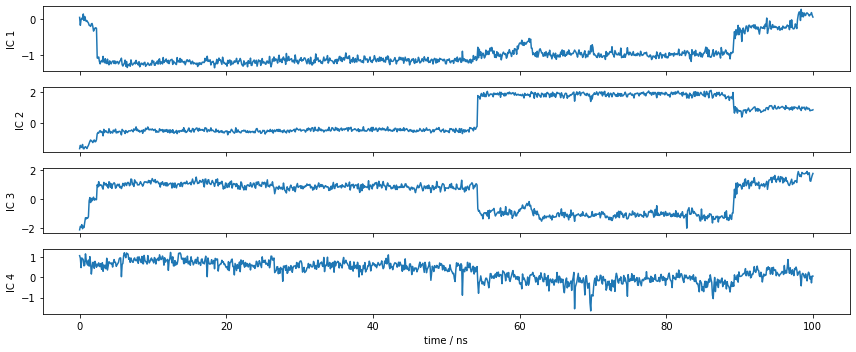

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()


In [16]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

In [ ]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

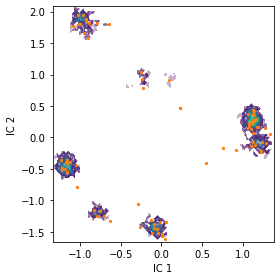

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|                                                                                 …

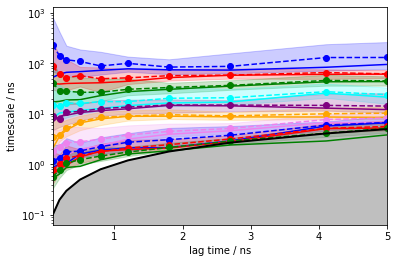

In [18]:
its = pyemma.msm.its(cluster.dtrajs, lags=50, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

In [20]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=1, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[12]: compute stat. inefficiencies:   0%|                       …

pyemma.msm.estimators.bayesian_msm.BayesianMSM[12]: Sampling MSMs:   0%|                                      …

fraction of states used = 1.00
fraction of counts used = 1.00


In [21]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import mdshare  # for trajectory data

from tqdm.notebook import tqdm  # progress bar

In [22]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")
torch.set_num_threads(12)

print(f"Using device {device}")

Using device cpu


In [18]:

# Define the dihedral indices
dihedral_1_indices = [5, 10, 15, 20]
dihedral_2_indices = [30, 20, 40, 60]

# Compute the dihedrals using the mdtraj library
dihedrals_1 = md.compute_dihedrals(traj, [dihedral_1_indices])
dihedrals_2 = md.compute_dihedrals(traj, [dihedral_2_indices])

# Concatenate the dihedrals to form a feature array
features = np.column_stack([dihedrals_1, dihedrals_2])


In [19]:
np.shape(features)

(1001, 2)

In [20]:
topfile = mdshare.fetch('alanine-dipeptide-nowater.pdb', working_directory='data')

In [19]:
ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory="data"
)
with np.load(ala_coords_file) as fh:
    data = fh["arr_0"]

dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = fh["arr_0"]

In [68]:
np.shape(dihedral)

(250000, 2)

In [33]:
ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory="data"
)
with np.load(ala_coords_file) as fh:
    data = [fh[f"arr_{i}"].astype(np.float32) for i in range(3)]

dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = [fh[f"arr_{i}"] for i in range(3)]

In [12]:
np.shape(data)

(2502, 1881)

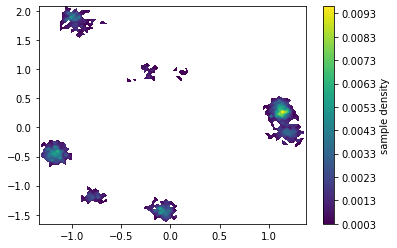

In [27]:
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, cmap="viridis")
plt.show()

estimating BayesianMSM:   0%|                                                                                 …

/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 74 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


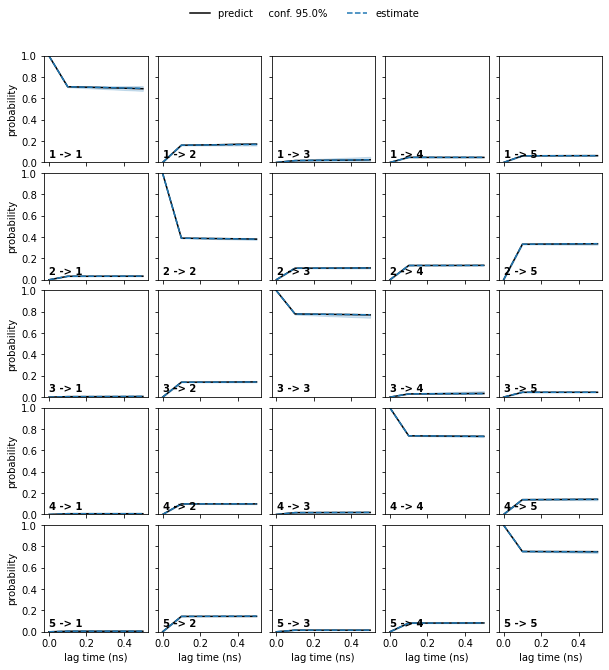

In [111]:
nstates = 5
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');

In [12]:
# from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

In [38]:
# dataset=TrajectoryDataset(lagtime=1, trajectory=heavy.astype(np.float32))

In [39]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

dataset = TrajectoriesDataset.from_numpy(1, torsions_data)

In [40]:
np.shape(dataset)

(2499, 2, 144)

In [41]:
n_val = int(len(dataset)*.1)
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

In [42]:
np.shape(dataset)

(2499, 2, 144)

In [43]:
np.shape(train_data)

(2250, 2, 144)

In [49]:
torsions_data[0].shape[1]

144

In [90]:
lobe = nn.Sequential(
    nn.BatchNorm1d(torsions_data[0].shape[1]),
    nn.Linear(torsions_data[0].shape[1], 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 6),
    nn.Softmax(dim=1)  # obtain fuzzy probability distribution over output states
)

lobe = lobe.to(device=device)
print(lobe)

Sequential(
  (0): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=144, out_features=20, bias=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): ELU(alpha=1.0)
  (5): Linear(in_features=20, out_features=20, bias=True)
  (6): ELU(alpha=1.0)
  (7): Linear(in_features=20, out_features=20, bias=True)
  (8): ELU(alpha=1.0)
  (9): Linear(in_features=20, out_features=20, bias=True)
  (10): ELU(alpha=1.0)
  (11): Linear(in_features=20, out_features=6, bias=True)
  (12): Softmax(dim=1)
)


In [91]:
from deeptime.decomposition.deep import VAMPNet

vampnet = VAMPNet(lobe=lobe, learning_rate=5e-3, device=device)

In [92]:
from torch.utils.data import DataLoader

loader_train = DataLoader(train_data, batch_size=10000, shuffle=True)
loader_val = DataLoader(val_data, batch_size=len(val_data), shuffle=False)

In [93]:
model = vampnet.fit(loader_train, n_epochs=40,
                    validation_loader=loader_val, progress=tqdm).fetch_model()

VAMPNet epoch:   0%|          | 0/40 [00:00<?, ?it/s]

In [146]:
model

VAMPNetModel-140715910060736:device=None, dtype=None,
               lobe=Sequential(
  (0): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=144, out_features=20, bias=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): ELU(alpha=1.0)
  (5): Linear(in_features=20, out_...): ELU(alpha=1.0)
  (11): Linear(in_features=20, out_features=6, bias=True)
  (12): Softmax(dim=1)
),
               lobe_timelagged=Sequential(
  (0): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=144, out_features=20, bias=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): ELU(alpha=1.0)
  (5): Linear(in_featur...): ELU(alpha=1.0)
  (11): Linear(in_features=20, out_features=6, bias=True)
  (12): Softmax(dim=1)
)]

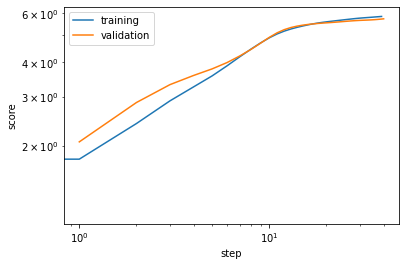

In [94]:
plt.loglog(*vampnet.train_scores.T, label='training')
plt.loglog(*vampnet.validation_scores.T, label='validation')
plt.xlabel('step')
plt.ylabel('score')
plt.legend();

In [173]:
state_probabilities = model.transform(torsions_data)

# f, axes = plt.subplots(3, 2, figsize=(12, 16))
# for i, ax in enumerate(axes.flatten()):
#     ax.scatter(*tica_output[0][::5].T, c=state_probabilities[..., i][::5])
#     ax.set_title(f'State {i+1}')

In [174]:
state_probabilities = state_probabilities[0]

In [175]:
N_time_steps = state_probabilities.shape[0]
N_states = state_probabilities.shape[1]

populations = np.zeros(N_states)

for i in range(N_states):
    for t in range(N_time_steps):
        populations[i] += state_probabilities[t, i]
    populations[i] /= N_time_steps

populations /= populations.sum()


In [170]:
populations

array([0.04505544, 0.31875804, 0.02767071, 0.51242665, 0.03483956,
       0.0612496 ])

IndexError: index 500 is out of bounds for axis 0 with size 500

In [130]:
state_probabilities = model.transform(torsions_data[2])
for ix, (mini, maxi) in enumerate(zip(np.min(state_probabilities, axis=0),
                                      np.max(state_probabilities, axis=0))):
    print(f"State {ix+1}: [{mini}, {maxi}]")

State 1: [0.0029572201892733574, 0.5357660055160522]
State 2: [0.011738091707229614, 0.4521355926990509]
State 3: [0.013777454383671284, 0.6091873049736023]
State 4: [0.009225696325302124, 0.7554965019226074]
State 5: [0.005248998291790485, 0.8555597066879272]
State 6: [0.028350427746772766, 0.8016685843467712]


In [131]:
np.shape(tica_output)

(3,)

In [132]:
np.shape(state_probabilities)

(1001, 6)

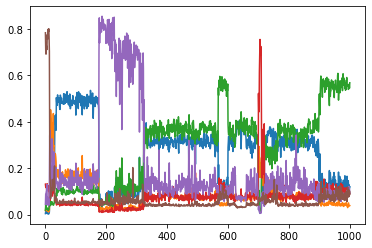

In [133]:
plt.plot(state_probabilities)

In [134]:
assignments = state_probabilities.argmax(1)

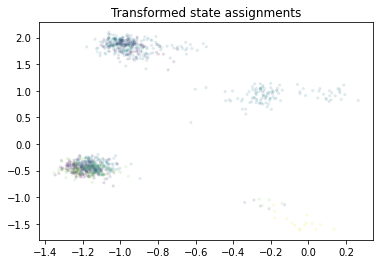

In [135]:
# assignments = state_probabilities.argmax(1)
plt.scatter(*tica_output[0][:, :2].T, c=assignments, s=5, alpha=.1)
plt.title('Transformed state assignments');

In [136]:
from deeptime.decomposition import VAMP

vamp_estimator = VAMP(lagtime=2, observable_transform=model)
vamp = vamp_estimator.fit(torsions_data).fetch_model()
print(f"VAMP-2 score under lag 10: s = {vamp.score(2).round(2)}")

VAMP-2 score under lag 10: s = 5.77


  0%|          | 0/4 [00:00<?, ?it/s]

Text(0, 0.5, 'timescale')

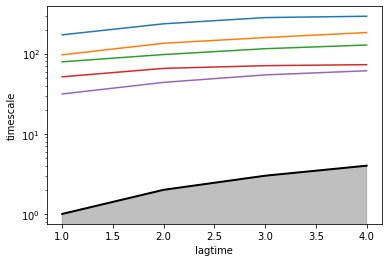

In [143]:
from deeptime.util.validation import implied_timescales, ck_test
from deeptime.plots import plot_implied_timescales, plot_ck_test

lagtimes = np.arange(1, 5, dtype=np.int32)
vamp_models = [VAMP(lagtime=lag, observable_transform=model).fit_fetch(torsions_data) for lag in tqdm(lagtimes)]

ax = plot_implied_timescales(implied_timescales(vamp_models))
ax.set_yscale('log')
ax.set_xlabel('lagtime')
ax.set_ylabel('timescale')

In [145]:
vamp_models

[CovarianceKoopmanModel-140715801528592:cov=CovarianceModel-140715800942096:bessels_correction=False,
                  cov_00=array([[ 0.02048, -0.00342,  0.01313, -0.02089, -0.00542, -0.00388],
        [-0.00342,  0.03248, -0.01024,  0.00743, -0.02279, -0.00346],
        [ 0.01313, -0.01024,  0.02613, -0.02059, -0.00622, -0.00221],
        ...t=array([0.1378 , 0.16771, 0.14324, 0.24551, 0.22314, 0.0826 ]),
                  symmetrized=False],
                     dim=None, epsilon=1e-06,
                     instantaneous_coefficients=array([[ 0.12326,  1.2691 , -0.02403,  0.28327,  8.18538],
        [-2.07464, -4.15348, -1.70111,  0.62916, -1.38746],
        [ 1.77696,  0.73636, -3.61764, -2.28067, -5.76889],
        [-1.81464,  2.85425, -0.10442,  0.59163, -0.10317],
        [ 0.60196,  0.42498, -0.26681,  3.08974, -0.71161],
        [ 1.38709, -1.1312 ,  5.71401, -2.31314, -0.21425]]),
                     instantaneous_obs=<deeptime.basis._base.Concatenation object at 0x7ffaf354

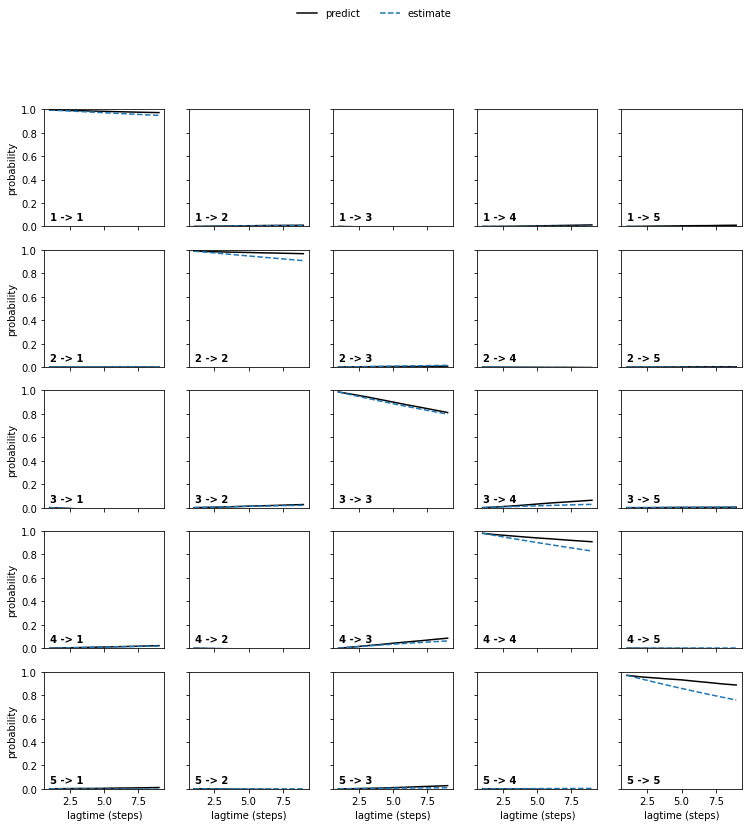

In [110]:
plot_ck_test(vamp_models[0].ck_test(vamp_models));

In [113]:
vamp = vamp_models[0]
print(vamp.lagtime)

1


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

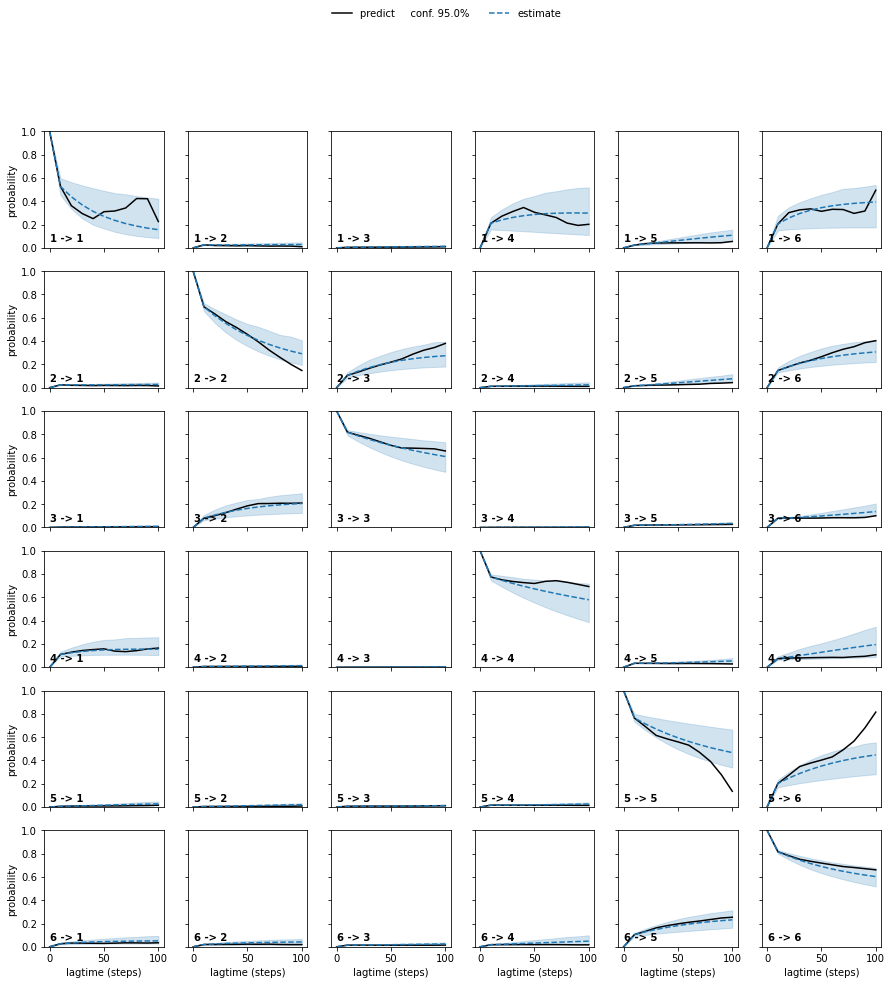

In [116]:
from deeptime.clustering import KMeans
from deeptime.markov import TransitionCountEstimator
from deeptime.markov.msm import BayesianMSM

projections = [vamp.transform(traj) for traj in torsions_data]
cluster = KMeans(40, progress=tqdm).fit_fetch(projections)
dtrajs = [cluster.transform(x) for x in projections]

bmsms = [BayesianMSM(lagtime=lag).fit_fetch(dtrajs) for lag in tqdm([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])]
ck_test = bmsms[0].ck_test(bmsms, 6)
plot_ck_test(ck_test);